# Desafío 2 - Visualización

### Ezequiel Gonzalez Luriaud

#### Importación de librerías a utilizar

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del DataSet

In [5]:
studentsDF = pd.read_csv('../data/DS - Students.csv')

display(studentsDF.head(10))

display(studentsDF.columns)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

## Checkeo de Nulls y celdas en blanco

In [6]:
studentsDF.isnull().sum().sum()

0

In [7]:
np.where(studentsDF.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Vemos que no hay celdas con valores null o vacias.

## Visualizaciones

### Matplotlib

#### 1er Gráfico - Barras Course vs Approved 1st Sem

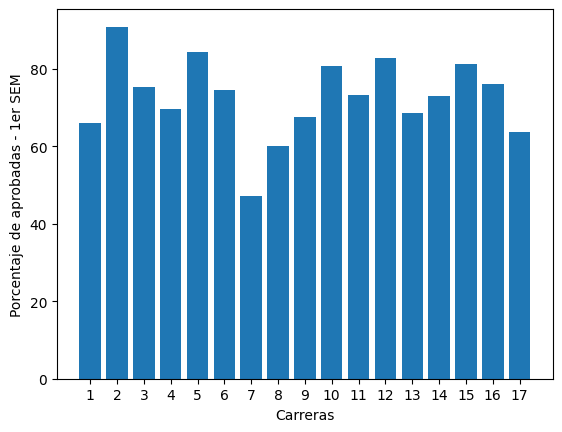

In [21]:
fig1, ax1 = plt.subplots()
# Calculamos la suma de materias aprobadas y materias anotadas en el 1er semestre según carrera.
enrolledByCourse = studentsDF.groupby(by=["Course"])["Curricular units 1st sem (enrolled)"].sum()
approvedByCourse = studentsDF.groupby(by=["Course"])["Curricular units 1st sem (approved)"].sum()


# Calculamos la relación entre aprobadas/anotadas
approvedPercentageByCourse = (approvedByCourse/enrolledByCourse)*100


#Graficamos 
ax1.set_xticks(approvedPercentageByCourse.index)
ax1.bar(approvedPercentageByCourse.index,approvedPercentageByCourse)
ax1.set_xlabel("Carreras")
ax1.set_ylabel("Porcentaje de aprobadas - 1er SEM")

plt.show()


Podemos ver que las carreras se mantienen bastante parejas en cuanto a porcentaje de aprobación (1er SEM), pero hay una notablemente baja: la 7. Se podría decir que los estudiantes de la carrera 7 tienen menos chance de aprobar las materias del 1er SEM. (falta investigar)

#### 2do Gráfico - Scatterplot - % Aprobadas 1er S. vs 2do S.

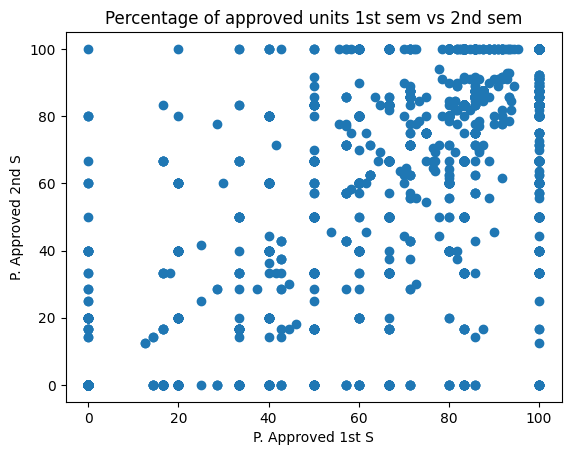

In [22]:
fig, ax = plt.subplots()
#Calculamos el porcentaje de aprobadas del 1er semestre
percentageOfApproved1st = studentsDF['Curricular units 1st sem (approved)']/studentsDF['Curricular units 1st sem (enrolled)']*100
percentageOfApproved1st.fillna(0,inplace=True)

#Ahora el porcentaje de aprobadas del 2do semestre.
percentageOfApproved2nd = studentsDF['Curricular units 2nd sem (approved)']/studentsDF['Curricular units 2nd sem (enrolled)']*100
percentageOfApproved2nd.fillna(0,inplace=True) #Removemos los NaN de la división por cero.

ax.scatter(percentageOfApproved1st,percentageOfApproved2nd)

ax.set_title('Percentage of approved units 1st sem vs 2nd sem')
ax.set_xlabel('P. Approved 1st S')
ax.set_ylabel('P. Approved 2nd S')

plt.show()


Vemos que no hay mucha relación entre los porcentajes de materias aprobadas, pero podemos notar que de 60% a 100% en el eje X, la densidad de puntos en  aumenta en la sección 60% a 100% del eje Y. Esto nos puede indicar que los alumnos con porcentajes altos de aprobadas en el 1er Semestre, tienen más probabilidad de tener un porcentaje alto de aprobadas en el 2do Semestre.

#### 3er Gráfico - Pie plot - Porcentaje de carreras sobre el total

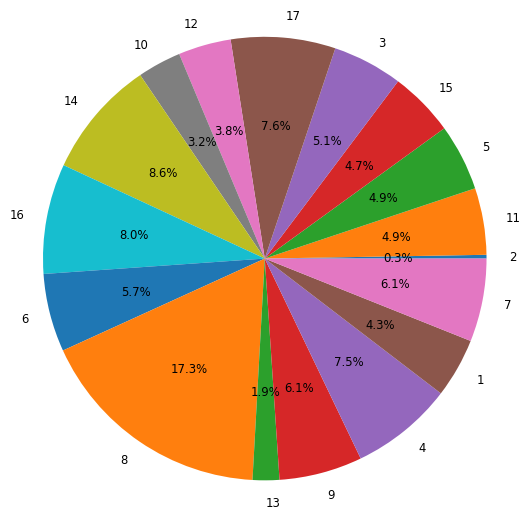

In [48]:
labels = studentsDF['Course'].unique()
sizes = studentsDF['Course'].value_counts().sort_index()

fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'size': 'smaller'},radius=1.5)
#ax3.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Este gráfico nos es útil para ver los porcentajes de alumnos de cada carrera, dentro del universo de alumnos. Observamos que la carrera 2 compone un porcentaje notablemente bajo del total, y por el contrario la carrera 8 uno extremadamente alto.

### Seaborn

#### 1er Gráfico - Boxplot Debtor vs Grade 1st Semester

<AxesSubplot: xlabel='Debtor', ylabel='Curricular units 1st sem (grade)'>

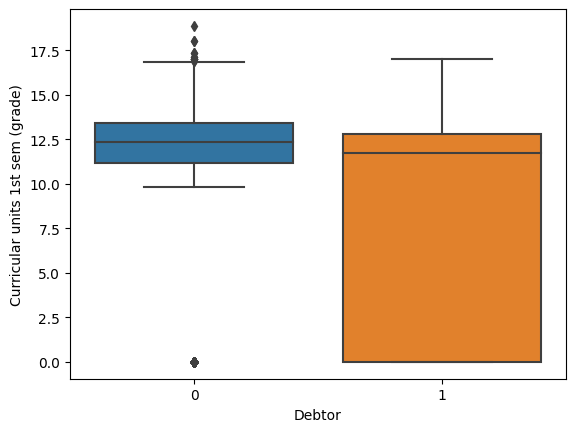

In [49]:
sns.boxplot(x="Debtor",y="Curricular units 1st sem (grade)",data=studentsDF)

Vemos que aquellos que son deudores tienen una peor distribución de notas que los que no lo son, parecería ser una variable que influye en la nota del 1er S.

#### 2do Gráfico - countplot de la variable Target

<AxesSubplot: xlabel='Target', ylabel='count'>

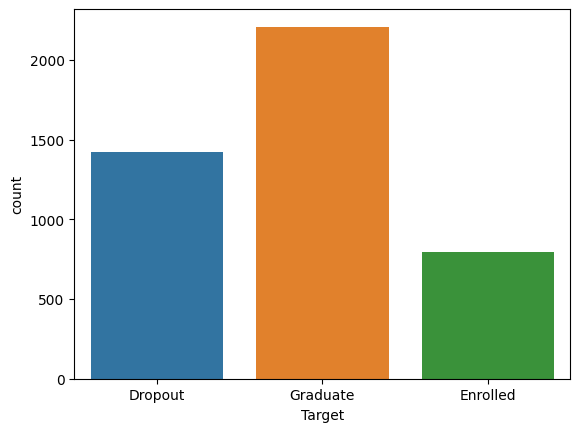

In [50]:
sns.countplot(x=studentsDF["Target"])

Vemos que la mayoría de las unidades son "Graduate", por lo tanto el modelo podría favorecer la predicción de la clase Graduado con más precisión, a costa de las demás.